In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [3]:
train_data = unpickle('data/train')
test_data = unpickle('data/test')
labels = unpickle('data/meta')
interesting_coarse_labels = [0, 1]  # Aquatic mammals and Fish


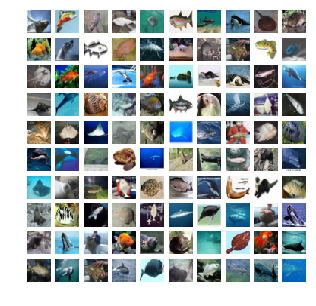

In [4]:
train = []
y = []
test = []
y_test = []
for i in range(len(train_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if train_data[b'coarse_labels'][i] == j:
            train.append(train_data[b'data'][i])
            y.append(j)
            break

for i in range(len(test_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if test_data[b'coarse_labels'][i] == j:
            test.append(test_data[b'data'][i])
            y_test.append(j)
            break

train = np.array(train)
y = np.array(y)
test = np.array(test)
y_test = np.array(y_test)
train_reshaped = train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_reshaped = test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Visualizing CIFAR 100
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(train_reshaped)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(train_reshaped[i:i + 1][0])


In [26]:
import numpy as np


class LogisticRegression:
    def __init__(self):
        self.X = None
        self.y = None
        self.w = None
        return

    @staticmethod
    def sigmoid(y):
        y = np.clip(y, -500, 500)
        return 1.0 / (1.0 + np.exp(-y))

    @staticmethod
    def log_loss(y, ypred):
        eps = 10 ** -15
        ypred = np.clip(ypred, eps, 1 - eps)
        total_cost = -np.sum(y * np.log(ypred) + np.subtract(1, y) * np.log(np.subtract(1, ypred)))
        return total_cost / np.shape(ypred)[1]

    @staticmethod
    def get_updated_weights(w, learning_rate, x, y, ypred):
        w = w - (learning_rate * np.dot((ypred - y), np.transpose(x)))
        return w

    def train(self, x, y, iteration=100, learning_rate=1):
        number_of_samples = np.shape(x)[1]
        bias = np.repeat(1, number_of_samples).reshape((1, number_of_samples))
        self.X = np.concatenate((bias, x))
        self.X = self.X - np.mean(self.X)
        self.X /= np.std(self.X)
        self.y = y
        labels_count = len(np.unique(self.y))
        self.w = np.zeros((labels_count, np.shape(self.X)[0]))

        for i in range(iteration):
            ypred = self.sigmoid(self.w.dot(self.X))
            loss = self.log_loss(y, ypred)
            if i % 100 == 0:
                print("Iteration ", i, " and loss ", loss)
            self.w = self.get_updated_weights(self.w, learning_rate, self.X, y, ypred)
        
        return ypred

    def predict(self, x_test):
        x_test = np.concatenate(([1], x_test))
        return np.argmax(self.sigmoid(self.w.dot(x_test)))

    def accuracy(self, test, y_test):
        success = 0
        number_of_samples = np.shape(test_reshaped)[1]
        for i in range(number_of_samples):
            if self.predict(test[:, i]) == y_test[i]:
                success += 1
        return (success / number_of_samples) * 100


In [27]:
nn = LogisticRegression()
x1 = np.array([[0, 1, 0], [1, 0, 1]])
y1 = np.array([[1, 0, 1], [0, 1, 0]])
nn.train(x1, y1, iteration=2, learning_rate=1)

Iteration  0  and loss  1.38629436112


array([[ 0.97702263,  0.04742587,  0.97702263],
       [ 0.02297737,  0.95257413,  0.02297737]])

In [28]:
nn = LogisticRegression()
# x = np.array([[1, 0], [0, 1]])
# y = np.array([[1, 0], [0, 1]])
# nn.train(x, y, iteration=2, learning_rate=10)
y_reshaped = []
for i in y:
    if i == 0:
        y_reshaped.append([1, 0])
    else:
        y_reshaped.append([0, 1])
y_reshaped = np.transpose(np.array(y_reshaped))
train_reshaped = np.transpose(train)
nn.train(train_reshaped[:, :], y_reshaped[:, :], iteration=1000, learning_rate=1)


Iteration  0  and loss  1.38629436112


Iteration  100  and loss  28.0443095001


Iteration  200  and loss  27.8385760121


Iteration  300  and loss  26.8561007609


Iteration  400  and loss  26.3741149415


Iteration  500  and loss  25.6675274976


Iteration  600  and loss  24.9372855316


Iteration  700  and loss  24.9349846987


Iteration  800  and loss  25.2066905465


Iteration  900  and loss  24.4090620833


array([[  7.12457641e-218,   7.12457641e-218,   1.00000000e+000, ...,
          7.12457641e-218,   7.12457641e-218,   7.12457641e-218],
       [  1.00000000e+000,   1.00000000e+000,   7.12457641e-218, ...,
          1.00000000e+000,   1.00000000e+000,   1.00000000e+000]])

In [1]:
test_reshaped = np.transpose(test)
nn.accuracy(test_reshaped, y_test)


NameError: name 'np' is not defined